<a href="https://colab.research.google.com/github/enes-karatas/AI_ML_test/blob/main/NLP_Project_Customer_Grievance_Analysis%26Categorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Grievance Analysis & Categorization Project

###Project Insight :

#### Subject :
 Analysing the customer complaints the bank has received over the past year for Major American multinational bank.

#### Problems :
The current time-consuming manual process for daily triaging and reviewing of customer complaints. The complaints data is currently underutilized in enhancing the quality of products and services.

#### Objective :

The goal is to use NLP techniques, such as text classification and sentiment analysis, to efficiently gain insights into the underlying causes of customer grievances. By leveraging these methods, we aim to better understand and address customer grievances, ultimately improving our grievance redressal process.

#### Summary :
- Applied NLP techniques to analyze sentiment and categorize customer feedback for accurate department routing.
- Performed feature engineering, clustering, and visualization; built models using logistic regression, sentiment analysis, and transformer-based approaches (BERT).


Dataset : https://docs.google.com/spreadsheets/d/1oY7aXafWfNCrBZwk8Lb6_m2rdDpFotaD/edit?gid=1510589720#gid=1510589720

#Contents

###1. Data Understanding & Preprocessing
- 1.1. Data Understanding & Preprocessing Report

###2. Text Feature Engineering & Complaint Classification
- 2.1. Classification with Logistic Regression Model
- 2.2. Text Feature Engineering & Complaint Classification Report

###3. Transformer-based Modeling & Sentiment Analysis
- 3.1. Classification with Sentiment Intensity Analyzer
- 3.2. Classification with Transformers (BERT)
- 3.3. Transformer-based Modeling & Sentiment Analysis Report

###4. Business Insights & Strategy Recommendations

###5. Final Report

--------------------------------------------------------------------------------

## 1. Data Understanding & Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
# Converting excel file to csv and getting datframe out of it
excel_file = pd.read_excel('banking_complaints_2023.xlsx')
excel_file.to_csv("banking_complaints_2023.csv", index=False)
df_raw = pd.read_csv('banking_complaints_2023.csv')

# Dataset copied on df
df = df_raw.copy()

In [ ]:
df.head(3)

,Complaint ID,Date Received,Banking Product,Issue ID,Complaint Description,State,ZIP,Bank Response
0,CID76118977,2023-01-01,Checking or savings account,I_3510635,on XX/XX/XX22 I opened a safe balance account ...,California,92311,Closed with monetary relief
1,CID98703933,2023-01-01,"Credit reporting, credit repair services, or o...",I_3798538,There is an item from Bank of ABC on my credit...,California,91344,Closed with explanation
2,CID52036665,2023-01-01,Checking or savings account,I_3648593,On XX/XX/XX22 I found out that my account was ...,New York,10466,Closed with monetary relief


In [ ]:
df.shape
# Dataset has 8 columns and 7011 rows

(7011, 8)

In [ ]:
df.isna().sum()
# Couple NA found under State and Zip column, since they're not many dropna will be applied below

,0
Complaint ID,0
Date Received,0
Banking Product,0
Issue ID,0
Complaint Description,0
State,27
ZIP,30
Bank Response,0


In [ ]:
# Na rows dropped
df = df.dropna()
df.isna().sum()
print(df.isna().sum())
print()
print(df.shape)

Complaint ID             0
Date Received            0
Banking Product          0
Issue ID                 0
Complaint Description    0
State                    0
ZIP                      0
Bank Response            0
dtype: int64

(6979, 8)


In [ ]:
df.info()
# We have dataset shape of (6979, 8), null values dropped
# All datatypes are in object dtype,
# 'Date Received' column will be converted to date-time format
# 'Banking Product' , 'Complaint Description' and 'Bank Response' columns will be preprocessed

<class 'pandas.core.frame.DataFrame'>
Index: 6979 entries, 0 to 7010
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Complaint ID           6979 non-null   object
 1   Date Received          6979 non-null   object
 2   Banking Product        6979 non-null   object
 3   Issue ID               6979 non-null   object
 4   Complaint Description  6979 non-null   object
 5   State                  6979 non-null   object
 6   ZIP                    6979 non-null   object
 7   Bank Response          6979 non-null   object
dtypes: object(8)
memory usage: 490.7+ KB


In [ ]:
df.head(2)

,Complaint ID,Date Received,Banking Product,Issue ID,Complaint Description,State,ZIP,Bank Response
0,CID76118977,2023-01-01,Checking or savings account,I_3510635,on XX/XX/XX22 I opened a safe balance account ...,California,92311,Closed with monetary relief
1,CID98703933,2023-01-01,"Credit reporting, credit repair services, or o...",I_3798538,There is an item from Bank of ABC on my credit...,California,91344,Closed with explanation


In [ ]:
# Dropping unnecessary columns for simplicity, those columns will not be used to train model or make prediction
df_cleaned = df.drop(["Complaint ID" , "Issue ID" , "State" , "ZIP"], axis=1)

In [ ]:
df_cleaned.head(3)

,Date Received,Banking Product,Complaint Description,Bank Response
0,2023-01-01,Checking or savings account,on XX/XX/XX22 I opened a safe balance account ...,Closed with monetary relief
1,2023-01-01,"Credit reporting, credit repair services, or o...",There is an item from Bank of ABC on my credit...,Closed with explanation
2,2023-01-01,Checking or savings account,On XX/XX/XX22 I found out that my account was ...,Closed with monetary relief


In [ ]:
# Casting 'Date Received' column to date-time format
df_cleaned["Date Received"] = pd.to_datetime(df["Date Received"], errors="coerce")


In [ ]:
# Identifing Date Range
min_date = df_cleaned["Date Received"].min()
max_date = df_cleaned["Date Received"].max()

print("Date Range:", min_date, "to", max_date)

# Date entry range is from January 1st, 2023 to 21st October, 2023

Date Range: 2023-01-01 00:00:00 to 2023-10-21 00:00:00


In [ ]:
df_cleaned['Banking Product'].value_counts()

,count
Banking Product,
Checking or savings account,1642
Credit card or prepaid card,1228
Mortgage,847
Debt collection,748
"Credit reporting, credit repair services, or other personal consumer reports",559
Credit reporting,550
"Money transfer, virtual currency, or money service",398
Credit card,359
Bank account or service,256


In [ ]:
# Mapping 'banking product' column and creating corresponding 'department' column
label_map = {'Checking or savings account':'CASA' ,
             'Credit card or prepaid card': 'Credit Cards' ,
             'Mortgage':'Mortgage' ,
             'Debt collection':'Loans' ,
             'Credit reporting, credit repair services, or other personal consumer reports':'Credit Reports' ,
             'Credit reporting':'Credit Reports' ,
             'Money transfer, virtual currency, or money service':'Remittance' ,
             'Credit card':'Credit Cards',
             'Bank account or service':'Others' ,
             'Student loan':'Loans' ,
             'Consumer Loan':'Loans' ,
             'Vehicle loan or lease':'Loans' ,
             'Payday loan':'Loans' ,
             'Prepaid card':'Credit Cards' ,
             'Payday loan, title loan, or personal loan':'Loans' ,
             'Money transfers':'Remittance' ,
             'Other financial service':'Others'
             }
df_cleaned['Department'] = df_cleaned['Banking Product'].map(label_map)

In [ ]:
df_cleaned['Department'].value_counts()

,count
Department,
CASA,1642
Credit Cards,1604
Loans,1111
Credit Reports,1109
Mortgage,847
Remittance,409
Others,257


In [ ]:
# Mapping banking product column and creating equivalent department column
label_numeric_map_department = {
             'CASA':0 ,
             'Credit Cards':1 ,
             'Loans':2 ,
             'Credit Reports':3 ,
             'Mortgage':4 ,
             'Remittance':5 ,
             'Others':6 ,
             }
df_cleaned['Department_mapped'] = df_cleaned['Department'].map(label_numeric_map_department)

In [ ]:
df_cleaned.sample(5)

,Date Received,Banking Product,Complaint Description,Bank Response,Department,Department_mapped
2532,2023-06-28,Checking or savings account,This has been going on with Bank Of ABC in XXX...,Closed with monetary relief,CASA,0
4675,2023-01-21,Debt collection,I called XXXX to ask why there is a collection...,Closed with explanation,Loans,2
1167,2023-03-26,Credit card or prepaid card,Bank of ABC performed a hard credit inquiry an...,Closed with non-monetary relief,Credit Cards,1
872,2023-03-06,"Money transfer, virtual currency, or money ser...","XX/XX/XXXX, there was a fraud transaction on m...",Closed with monetary relief,Remittance,5
5658,2023-04-01,Debt collection,Our household received a letter at our family ...,Closed with explanation,Loans,2


In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer

# Getting NLTK toolkit to handle removing punctuation, stopword removal, lemmatization
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # For better lemmatization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Preprocessing 'Complain Description' column.

# Creating stopword and lemmatizer objects
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Created function to remove punctuation, stopwords, numbers, also lowercasting and lemmatizing the text
def text_cleaner(text):

  # Removing punctuation and lowercasing the text
  text = re.sub(r'[^\w\s]', '', text.lower())
  # Removing numbers ,replacing digits with space
  text = re.sub(r'\d+', '', text)
  # Tokenizing the text
  tokens = text.split()
  filtered_tokens = []

  # Checking stop word match for tokens and not storing if word is stop word, getting non-stopwords
  # Storing lemmatized non-stopwords in filtered_tokens as tokens
  for word in tokens:
        if word not in stop_words:
            filtered_tokens.append(lemmatizer.lemmatize(word))
  return ' '.join(filtered_tokens)


In [ ]:
# Apply cleaning and putting cleaned texts in new 'Complaint Description_processed' column
df_cleaned['Complaint Description_processed'] = df_cleaned['Complaint Description'].apply(text_cleaner)

In [ ]:
df_cleaned.sample(5)

,Date Received,Banking Product,Complaint Description,Bank Response,Department,Department_mapped,Complaint Description_processed
5888,2023-04-16,Prepaid card,my debit card direct express debit card which ...,Closed with explanation,Credit Cards,1,debit card direct express debit card issued so...
4881,2023-02-06,Credit card,I had a dispute in the amount of {$240.00} wit...,Closed with explanation,Credit Cards,1,dispute amount xxxx xxxx card ending xxxx merc...
2319,2023-06-14,Debt collection,BANK OF ABC XXXX XX/XX/XXXX Account charged of...,Closed with explanation,Loans,2,bank abc xxxx xxxxxxxx account charged xxxx wr...
4207,2023-09-27,Credit card or prepaid card,On XX/XX/XXXX XXXX transactions were made thro...,Closed with monetary relief,Credit Cards,1,xxxxxxxx xxxx transaction made atm never calle...
3600,2023-08-24,Debt collection,XXXX alleges owns XXXX XXXX XXXX XXXX XXXX NM ...,Closed with explanation,Loans,2,xxxx alleges owns xxxx xxxx xxxx xxxx xxxx nm ...


In [ ]:
# Dtypes are objects. no need for casting, I'll vectorize feature column(Complaint Description_processed) in future steps
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6979 entries, 0 to 7010
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date Received                    6979 non-null   datetime64[ns]
 1   Banking Product                  6979 non-null   object        
 2   Complaint Description            6979 non-null   object        
 3   Bank Response                    6979 non-null   object        
 4   Department                       6979 non-null   object        
 5   Department_mapped                6979 non-null   int64         
 6   Complaint Description_processed  6979 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 694.2+ KB


In [ ]:
# Re-ordering columns
df_cleaned = df_cleaned[['Date Received' , 'Banking Product' , 'Complaint Description' , 'Complaint Description_processed' , 'Department' , 'Department_mapped' , 'Bank Response']]

In [ ]:
df_cleaned.sample(3)

,Date Received,Banking Product,Complaint Description,Complaint Description_processed,Department,Department_mapped,Bank Response
4740,2023-01-26,Credit reporting,I have been disputing this information for the...,disputing information past two year keep getti...,Credit Reports,3,Closed with non-monetary relief
6693,2023-06-13,Credit reporting,"In XX/XX/XXXX, I contacted Transunion and spok...",xxxxxxxx contacted transunion spoke representa...,Credit Reports,3,Closed with explanation
62,2023-01-05,Mortgage,I completed the logon process to my Bank of AB...,completed logon process bank abc account proce...,Mortgage,4,Closed with non-monetary relief


In [ ]:
df_cleaned.shape

(6979, 7)

In [ ]:
# Checking how many duplicates in Feature column
print(df_cleaned['Complaint Description_processed'].duplicated().sum())

40


In [ ]:
# Dropping duplicates from Feature column
df_cleaned = df_cleaned.drop_duplicates(subset=['Complaint Description_processed'], keep='first')

In [ ]:
df_cleaned['Complaint Description_processed'].shape

(6939,)

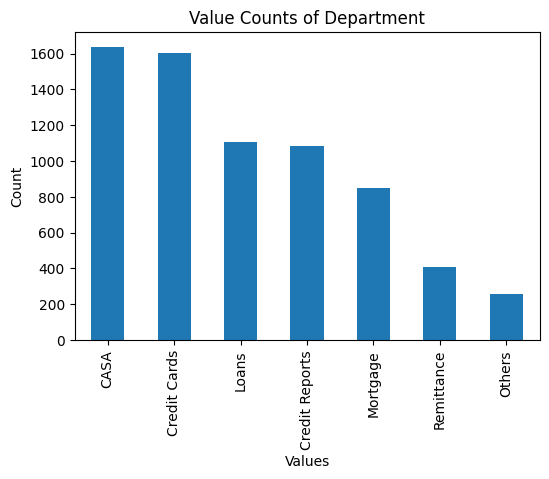

In [ ]:
# Checking imbalance of dataset

import matplotlib.pyplot as plt

df_cleaned['Department'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title("Value Counts of Department")
plt.xlabel("Values")
plt.ylabel("Count")
plt.show()

# There is a little bit imbalance in dataset

## 1.1. Data Understanding & Preprocessing Report :

- Raw dataset has 8 columns and 7011 rows
- Null and duplicates values are very few, those removed and dataset was not effected overall
- Data entry range is from January 1st, 2023 to 21st October, 2023
- 'Department' column created by mapping 'Banking Product' column, corresponding department assigned based on the product
- Department column mapped with numerics, numeric mappped Department column will be used as Target in model
- 'Complaint Description' column is preprocessed for sentiment analysis and for model training. Punctuation, stopwords, numbers are removed from text. Text also tokenized, lowercasted and lemmatized. Preprocessed text added as 'Complaint Description_processed' column.
- Dataset imbalance analyzed and visualized, class weight manipulation added to fight imbalance.

# 2. Text Feature Engineering & Complaint Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from collections import Counter
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold, cross_val_score



## 2.1. Classification with Logistic Regression Model

In [ ]:
from imblearn.over_sampling import SMOTE
# TF-IDF vectorization, we vectorize the dataset to feed model
tfidf = TfidfVectorizer()

# Determining Train dataset(X) and Target(y)
X = df_cleaned['Complaint Description_processed']
y = df_cleaned['Department_mapped']

# Vectorizing 'Complaint Description_processed' column
tfidf = TfidfVectorizer(
    max_features=5000,   # limit features
    min_df=5,            # ignore words appearing < 5 times
    max_df=0.8,          # ignore words appearing in > 80% of docs
    ngram_range=(1,2)    # include unigrams + bigrams
)
X_vec = tfidf.fit_transform(X)


# Splitting data to train and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y , test_size=0.2, random_state=42
)

# Feature column vectorized

In [ ]:
# Training Logistic Regression model

# Using GridSearchCV for parameter tuning and Kfold application
params = {'C': [0.1, 1, 10, 100, 1000]}
model_lr = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced'), params, cv=5, scoring='accuracy')
model_lr.fit(X_train, y_train)

# Logistic regression model was build with GridSearchCV to select best paramater tuning, K-fold 5 applied and class_weight='balanced' added to fight data imbalance

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000),
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, scoring='accuracy')

In [ ]:
# Classification Report

y_pred_lr = model_lr.predict(X_test) # Getting predictions
y_proba_lr = model_lr.predict_proba(X_test)[:, 1] # Select probabilities for the target classes
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Accuracy: 0.7543227665706052

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77       354
           1       0.83      0.71      0.76       321
           2       0.73      0.73      0.73       208
           3       0.74      0.78      0.76       203
           4       0.84      0.89      0.87       170
           5       0.52      0.71      0.60        83
           6       0.57      0.67      0.62        49

    accuracy                           0.75      1388
   macro avg       0.72      0.75      0.73      1388
weighted avg       0.76      0.75      0.76      1388



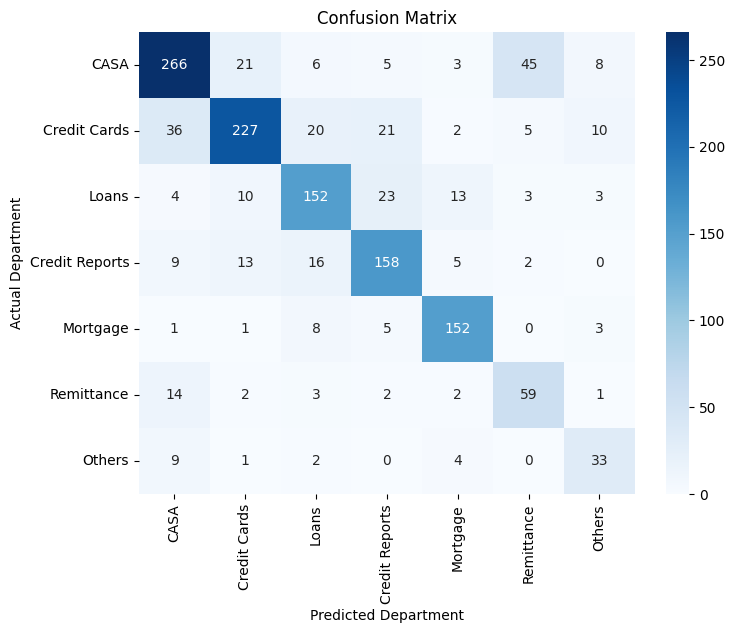

In [ ]:
# Confusion matrix

cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix')
# Use the mapped department names for axis labels
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_numeric_map_department.keys(),
            yticklabels=label_numeric_map_department.keys())

plt.xlabel('Predicted Department')
plt.ylabel('Actual Department')
plt.show()

In [ ]:
# Based on classification report and confusion matrix, Logistic REgression model works good to predicy for some class but works not good for some class also.
# Overall logistic regression model's preformance is not very good, I'll try other methods/models to improve prediction accuracy.

## 2.2. Text Feature Engineering & Complaint Classification Report :

- Feature column vectorized to make it suitable to feed model.

- Logistic regression model was build with GridSearchCV to select best paramater tuning, K-fold 5 applied and class_weight='balanced' added to fight data imbalance.

- Based on classification report and confusion matrix, Logistic Regression model works good to predict some classes but works not good for some classes also.

- Overall Logistic Regression model's performance is not enough due to dataset  imbalance, also its hard and not best practice to create syntetic data for text data, I'll try other methods/models to solve this task.


# 3. Transformer-based Modeling & Sentiment Analysis




## 3.1. Classification with Sentiment Intensity Analyzer

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Sentiment Intensity Analyzer is a way to understand text and take outcome from it by doing sentiment analysis on text.

# Initializing the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Creating function to categorize importance based on compound score
def get_importance(text):
    scores = analyzer.polarity_scores(str(text))
    compound = scores['compound']  # normalized sentiment score

    # Setting if-else logic based on compound scores
    # Compund takes values between -1 and 1, 1 means most positive comment and -1 means most negative
    # I'm splitting compound range to create some labels
    if compound >= 0.5: #
        return "Less Important"
    elif compound >= 0 and compound < 0.5 :
        return " Important"
    elif compound >= -0.5 and compound < 0 :
        return "High Important"
    else:
        return "Extremely Important"

# Apply get_importance function to dataset
df_cleaned['Complaint Importance'] = df_cleaned['Complaint Description_processed'].apply(get_importance)

# Store compound score for reference
df_cleaned['Compound'] = df_cleaned['Complaint Description_processed'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])


# Compound scores greater than 0.5 categorized as positive comments, those labeled as requires least attention.
# Compound scores between -0.5 and 0.5 categorized as neutral comments, those labeled as requires attention.
# Compound scores less than -0.5 categorized as negative comments, those labeled as requires high attention.

In [ ]:
# Preview results
#print(df_cleaned[['Complaint Description_processed', 'Compound', 'Importance']].head())
df_cleaned.head(3)

,Date Received,Banking Product,Complaint Description,Complaint Description_processed,Department,Department_mapped,Bank Response,Complaint Importance,Compound
0,2023-01-01,Checking or savings account,on XX/XX/XX22 I opened a safe balance account ...,xxxxxx opened safe balance account online usin...,CASA,0,Closed with monetary relief,Extremely Important,-0.8771
1,2023-01-01,"Credit reporting, credit repair services, or o...",There is an item from Bank of ABC on my credit...,item bank abc credit report belong must remove...,Credit Reports,3,Closed with explanation,Important,0.4588
2,2023-01-01,Checking or savings account,On XX/XX/XX22 I found out that my account was ...,xxxxxx found account frozen apparent reason we...,CASA,0,Closed with monetary relief,Important,0.0000


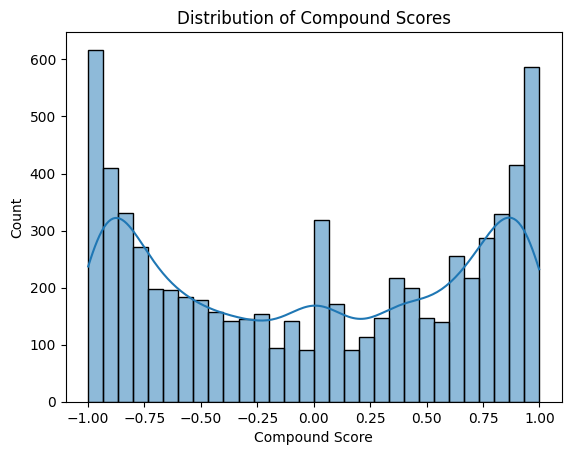

In [ ]:
# Visualization of compound score distribution

sns.histplot(df_cleaned['Compound'], kde=True, bins=30)
plt.title('Distribution of Compound Scores')
plt.xlabel('Compound Score')
plt.ylabel('Count')
plt.show()

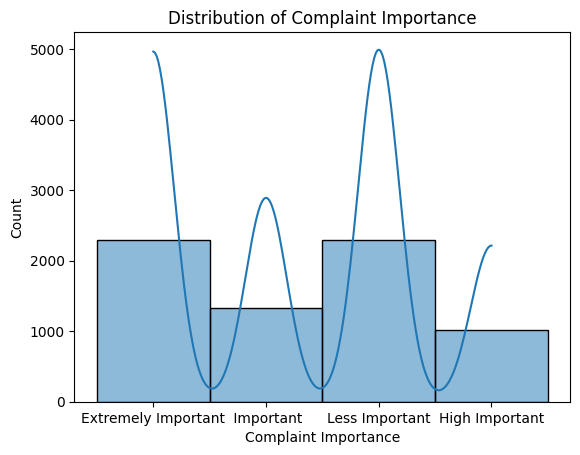

In [ ]:
# Visualization of Complaint Importance distribution

sns.histplot(df_cleaned['Complaint Importance'], kde=True, bins=30)
plt.title('Distribution of Complaint Importance')
plt.xlabel('Complaint Importance')
plt.ylabel('Count')
plt.show()

In [ ]:
# SentimentIntensityAnalyzer used to understand importance level of complaints by doing sentiment analysis on text
# Values closed to -1 contains most negative comments, those assigned to high importance
# Values between -0.5 and 0.5 contains neutral comments, those assigned to important
# Values closed to 1 contains least negative comments, those assigned to less importance

## 3.2. Classification with Transformers (BERT)

In [ ]:
# Installing tranformers library
!pip install transformers

In [ ]:
from transformers import pipeline

In [ ]:
from transformers import pipeline

# Using transformers, sentiment analysis pipeline to make sentiment analysis on text.

# Loading pre-trained Transformer model, model can classify text as positive or negative with a confidence score
text_classification = pipeline("sentiment-analysis")

# Define a function to split text into chunks because Transformer model have a token limit as 512
# To overcome token limit issue we divide texts to chunks with split_text and put them together later
def split_text(text, max_length=512):
    words = text.split()
    chunks = []
    current_chunk = []
    current_length = 0

    for word in words:
        if current_length + len(word) + 1 <= max_length:
            current_chunk.append(word)
            current_length += len(word) + 1
        else:
            chunks.append(" ".join(current_chunk))
            current_chunk = [word]
            current_length = len(word) + 1

    if current_chunk:
        chunks.append(" ".join(current_chunk))
    return chunks

# Appling the splitting function to the 'Complaint Description_processed' column
df_cleaned['Complaint Description_chunks'] = df_cleaned['Complaint Description_processed'].apply(split_text)

# Processing each chunk and aggregate results
def get_sentiment_from_chunks(chunks):
    if not chunks:
        return None, None  # Handle empty lists
    # Process the first chunk for simplicity. You might want a more complex logic here.
    result = text_classification(chunks[0])[0]
    return result['label'], result['score']

# Apply the function to get sentiment from chunks
df_cleaned[['predicted_label_BERT', 'score_BERT']] = df_cleaned['Complaint Description_chunks'].apply(
    lambda x: pd.Series(get_sentiment_from_chunks(x))
)

# Pre-trained Transformer model used to make sentiment analysis on text.
# Since BERT has token limitation for 512, text splitted to chunks to process.
# All texts in chunks was analyzed with BERT, prediction labels and scores was created in dataframe

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
df_cleaned.sample(5)

,Date Received,Banking Product,Complaint Description,Complaint Description_processed,Department,Department_mapped,Bank Response,Complaint Importance,Compound,Complaint Description_chunks,predicted_label_BERT,score_BERT
3991,2023-09-13,"Credit reporting, credit repair services, or o...",This is not a duplicate nor is this complaint ...,duplicate complaint filed third party filing c...,Credit Reports,3,Closed with explanation,Extremely Important,-0.7421,[duplicate complaint filed third party filing ...,NEGATIVE,0.986505
3858,2023-09-06,Checking or savings account,I have a bank of ABC checking account and {$XX...,bank abc checking account xx illegally charged...,CASA,0,Closed with monetary relief,Extremely Important,-0.5550,[bank abc checking account xx illegally charge...,NEGATIVE,0.993213
799,2023-03-01,Mortgage,"I was my XXXX caregiver for XXXX years, walkin...",xxxx caregiver xxxx year walking away business...,Mortgage,4,Closed with non-monetary relief,Less Important,0.7869,[xxxx caregiver xxxx year walking away busines...,NEGATIVE,0.998168
1699,2023-04-29,Checking or savings account,In accordance with the fair credit reporting a...,accordance fair credit reporting act xxxx acco...,CASA,0,Closed with explanation,Important,0.2023,[accordance fair credit reporting act xxxx acc...,NEGATIVE,0.978296
2142,2023-06-02,Credit card or prepaid card,The Investigation department back office for B...,investigation department back office bank abc ...,Credit Cards,1,Closed with explanation,Extremely Important,-0.9431,[investigation department back office bank abc...,NEGATIVE,0.998797


In [ ]:
df_cleaned['predicted_label_BERT'].value_counts()

# Bert predicted only 1% as positive and 99% as Negative

,count
predicted_label_BERT,
NEGATIVE,6867
POSITIVE,72


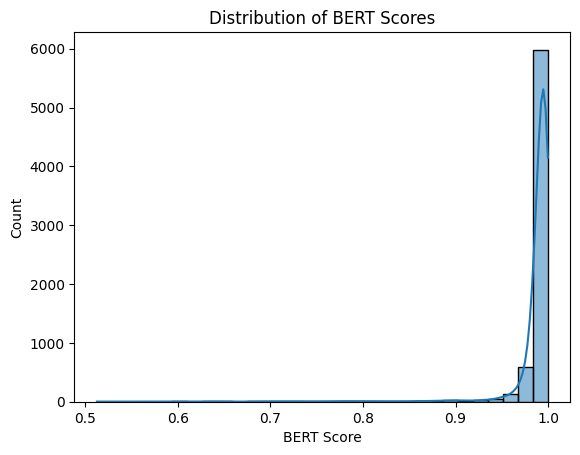

In [ ]:
# Visualization of BERT scores distribution

sns.histplot(df_cleaned['score_BERT'], kde=True, bins=30)
plt.title('Distribution of BERT Scores')
plt.xlabel('BERT Score')
plt.ylabel('Count')
plt.show()

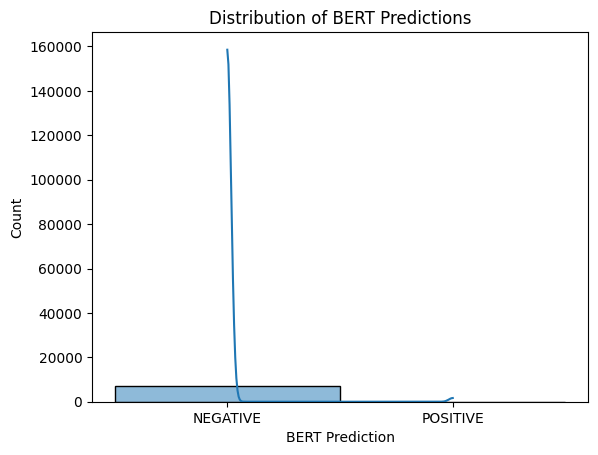

In [ ]:
# Visualization of BERT Predictions

sns.histplot(df_cleaned['predicted_label_BERT'], kde=True, bins=30)
plt.title('Distribution of BERT Predictions')
plt.xlabel('BERT Prediction')
plt.ylabel('Count')
plt.show()

In [ ]:
# When there is too many XXX's models cannot work for sentiment analysis properly
# BERT scores can be used to understand is the complain contains positive, negative or neutral comments. BERT score shows how percentage BERT is confident on comment classification
# Most of the BERT scores are above 95%, BERT scores are not very halpful to distinguish complaint importance
# SentimentIntensityAnalyzer

## 3.3 Transformer-based Modeling & Sentiment Analysis Report :

### Classification with Sentiment Intensity Analyzer :

- Sentiment Intensity Analyzer used to understand importance level of complaints by doing sentiment analysis on text. It analyzes the text and gives compound scores between -1 and 1. Sentiment Intensity Analyzer is fast and effective on short, informal text like complaint analysis so its good model choice for this task.

- Values closed to -1 contains most negative comments, those comments assigned and labeled as 'high importance' and saved in dataframe.

- Values between -0.5 and 0.5 contains neutral comments, those assigned and labeled as 'important' and saved in dataframe.

- Values closed to 1 contains least negative comments, those assigned and labeled as 'less importance' and saved in dataframe.

- Compound score distribution visualized.

- Column created in dataframe for importance levels of complaints based on compund score. Company can prioritize their support based on importance level that model labeled.

### Classification with Transformers (BERT) :

- BERT is pretrained model to make sentiment analysis on texts. In general, BERT works well on formal and informal text, long sentences, negations, sarcasm. BERT creates three labels; positive, negative and neutral based on sentiment score it extracts from text.

- Pretrained BERT model used in our task to make sentiment analysis on complaints texts.

- BERT created three labels; positive, negative and neutral based on sentiment score it extracted from text.

- Created labels and bert scores saved in dataframe.

- Task we're working on is analyzing complaints so BERT got too many Negative labels, BERT predicted only 1% as positive and 99% as Negative

- In our task, most of the BERT scores created are above 95%.

- BERT scores are not very helpful to distinguish complaint importance since it focuses texts positivity and negativity with high percentages.

- When there is too many XXX's in text model cannot work for sentiment analysis properly.

#### Summary :

- Sentiment Intensity Analyzer and Transformers was used to make sentiment analysis on customer complaint text data. Text positivity and negativity scores created. Importance levels of complaints categorized and scores also reflected to dataframe for reference





# 4. Business Insights & Strategy Recommendations

- Our models was analyzed customer complaints and categorized them based on sentiment scores.

- All customer complaints assigned to corresponding department

- All complaints now has importance level labels and also they all assigned corresponding department. All complaints also labeled based on their positivity which most of them are negative comments. Bank should prioritize complaints based on their importance levels and after directed those complaints to corresponding departments.

# 5. Final Report


## Data Understanding & Preprocessing :

- Raw dataset has 8 columns and 7011 rows.
- Null and duplicates values are very few, those removed and dataset was not effected overall.
- Data entry range is from January 1st, 2023 to 21st October, 2023.
- 'Department' column created by mapping 'Banking Product' column and corresponding department assigned based on the product.
- Department column mapped with numerics, numeric mapped Department column will be used as Target in model.
- 'Complaint Description' column is preprocessed for sentiment analysis. Punctuation, stopwords, numbers are removed from text. Text also tokenized, lowercasted and lemmatized. Preprocessed text added as 'Complaint Description_processed' column.
- Dataset imbalance analyzed and visualized, class weight manipulation added to fight imbalance.


## Text Feature Engineering & Complaint Classification :

- Feature column vectorized to make it suitable to feed model.

- Logistic regression model was build with GridSearchCV to select best paramater tuning, K-fold 5 applied and class_weight='balanced' added to fight data imbalance.

- Based on classification report and confusion matrix, Logistic Regression model works good to predict some classes but works not good for some classes.

- Overall Logistic Regression model's performance is not enough due to dataset  imbalance, also its hard and not best practice to create syntetic data for text data, I'll try other methods/models to solve this task.

## Transformer-based Modeling & Sentiment Analysis  :

####  Classification with Sentiment Intensity Analyzer :

- Sentiment Intensity Analyzer was used to understand importance level of complaints by doing sentiment analysis on text. It analyzes the text and gives compound scores between -1 and 1. Sentiment Intensity Analyzer is fast and effective on short, informal text like complaint analysis so its good model choice for this task.

- Values closed to -1 contains most negative comments, those comments assigned and labeled as 'high importance' and saved in dataframe.

- Values between -0.5 and 0.5 contains neutral comments, those assigned and labeled as 'important' and saved in dataframe.

- Values closed to 1 contains least negative comments, those assigned and labeled as 'less importance' and saved in dataframe.

- Compound score distribution visualized.

- Column created in dataframe for importance levels of complaints based on compund score. Company can prioritize their support based on importance level that model labeled.

####  Classification with Transformers (BERT) :

- BERT is pretrained model to make sentiment analysis on texts. In general, BERT works well on formal and informal text, long sentences, negations, sarcasm. BERT creates three labels; positive, negative and neutral based on sentiment score it extracts from text.

- Pretrained BERT model used in our task to make sentiment analysis on complaints texts.

- BERT created three labels; positive, negative and neutral based on sentiment score it extracted from text.

- Created labels and bert scores saved in dataframe.

- Task we're working on is analyzing complaints so BERT got too many Negative labels, BERT predicted only 1% as positive and 99% as Negative

- In our task, most of the BERT scores created are above 95%.

- BERT scores are not very helpful to distinguish complaint importance since it focuses texts positivity and negativity with high percentages.

- When there is too many XXX's in text model cannot work for sentiment analysis properly.

####  Summary of Transformer-based Modeling & Sentiment Analysis :

- Sentiment Intensity Analyzer and Transformers was used to make sentiment analysis on customer complaint text data. Text positivity and negativity scores created. Importance levels of complaints categorized and scores also reflected to dataframe for reference

##  Business Insights & Strategy Recommendations :

- Our models was analyzed customer complaints and categorized them based on sentiment scores and all customer complaints assigned to corresponding department, all complaints can assigned to related department so there won't be a que for complaints.

- All complaints now has importance level labels and also they all assigned corresponding department. All complaints also labeled based on their positivity which most of them are negative comments. Bank should prioritize complaints based on their importance levels and after directed those complaints to corresponding departments.
